In [ ]:
# statistics

In [ ]:
# subfields

# descriptive statistics
    # measures or descriptions used to assess some performance or indicator (ie: GPA, batting averages)
# inferential statistics
    # using knowledge from data to make informed inferences
# risk and probability 
    # likelihood of outcomes (important to insurance and finance companies)
# correlation and relationships
    # hypothesis testing, establishing correlations.
# modeling
    # making models, running simulations, predicting outcomes.

In [2]:
# pandas imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import os

# stats imports
import scipy.stats as st
import statsmodels.stats as smst
import statsmodels.formula.api as smf

# additional stats imports
from sklearn.neighbors import LocalOutlierFactor
from sklearn.utils import resample

# images
from IPython.display import Image, display

# to show image
def show_image(fn):
    fp1 = os.path.join('./diagrams/', fn)
    display(Image(filename=fp1, width=500))

In [4]:
# data 
fn = os.path.join('./data', 'IRIS.csv')

In [3]:
# loading data
    # manual
    # numpy.loadtxt
    # numpy.genfromtxt
    # pandas.read_csv
    # pickle

# manual
cols = None
data = []
with open(fn) as f:
    for line in f.readlines():
        row = line.replace('\n', '').split(',')
        if cols is None:
            cols = row
        else: 
            # data.append([ float(x) for x in row ])
            data.append(row)
df_manual = pd.DataFrame(data, columns = cols)
df_manual.head()

# numpy.loadtxt
arr_example = np.loadtxt(fn, skiprows=1, usecols=[0,1,2,3], delimiter=',')
arr_example[:5, :] # first 5 rows (all columns)

# numpy.genfromtxt
arr_example2 = np.genfromtxt(fn, delimiter=',', names=True, usecols=[0,1,2,3], dtype=None)
arr_example2[:5] # first 5 rows
arr_example2['sepal_length'][:5] # col -- 'sepal_length', rows, 0-4

# pandas.read_csv
df = pd.read_csv(fn)
df.at[0, 'sepal_length'] # row index 0, col 'sepal length'


5.1

In [4]:
# preview data

df = pd.read_csv(fn)
df.info()
df.describe()
len(df)
df.head()
df.shape

# grab columns
df[['sepal_length', 'sepal_width']]

# groupby
df.groupby('species').mean()
df.groupby('species').agg({'sepal_length': 'mean' }) # min, max, median, mean
df.groupby('species').agg(['min','max','median','mean'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length                    sepal_width              \
                         min  max median   mean         min  max median   
species                                                                   
Iris-setosa              4.3  5.8    5.0  5.006         2.3  4.4    3.4   
Iris-versicolor          4.9  7.0    5.9  5.936         2.0  3.4    2.8   
Iris-virginica           4.9  7.9    6.5  6.588         2.2  3.8    3.0   

                       petal_length                    petal_width       \
                  mean          min  max median   mean         min  max   
species                                                                   
Iris-setosa      3.418          1.0  1.9   1.50  1.464         0.1  0.6   
Iris-versicolor  2.770          3.0  5.1   4.35  4.260         1.0  1.8   
Iris-virginica   2.974          4.5  6.9   5.55  5.552         1.4  2.5   

                               
                median   mean  
species                        
Iris-setosa        0.2  0.244  
Iris-versicolor    1.3  1.326  
Iris-virginica     2.0  2.026

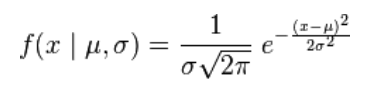

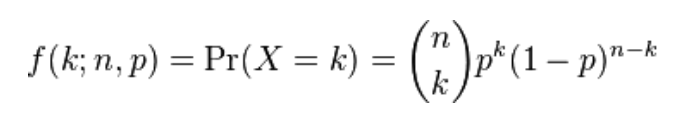

In [164]:
# variables
    # random variable -- variable whose value is subject to variations due to chance.
    # discrete random variables -- categorical variables (countable number of possible values)
    # continuous random variables -- numerical variables (infinitely many possible values)
    
# distribution (functions)
    # probability distribution -- each measureable subset of possible outcomes is assigned a probability.
    # probability mass function (pmf) -- prob that a discrete random var is exactly equal to some value
    # discrete probability distribution (cumulative mass function)
        # prob distribution characterized by pmf
    # probability density function (pdf) -- func that describes relative likelihood for random var to take given value
    # continous probability distribution (cumulative density function) (cdf)
        # prob that var takes value <= x
    # central limit theorem -- distribution of sample means approximates a normal distribution
        # large num of iterations, certain conditions, produces normal distribution.

# distributions
    # normal distribution -- gaussian distribution, bell shaped sitribution
    # uniform distribution -- all values have same frequency
    # bernoulli distribution -- yes/no question (q = 1 - p) (prob_of_failure = 1 - prob_of_success)
    # binomial distribution -- the number of successes in a fixed number of independent trials, 
    # negative binomial distribution -- the number of successes until threshold of failures is met.
    # geometric distribution -- the time between successes in a series of independent trials. 
    # poisson distribution -- the number of occurrences in a fixed period of time, 
    # exponential distribution -- the time between occurrences of successive events as time flows by continuously. 
        
show_image(fn='gaussian-dist.png')
show_image(fn='binomial-dist.png')

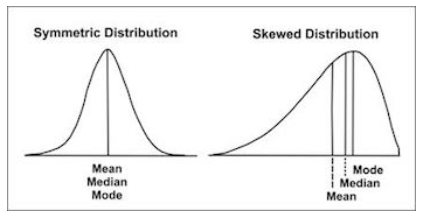

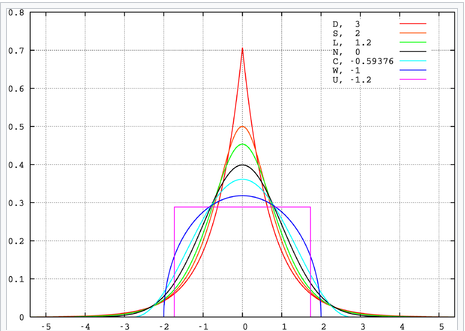

In [260]:
# distribution (shape)
    # skewness -- asymmetry in prob distribution. negative skew (tail left), positive skew (tail right).
    # kurtosis -- measure of the peakedness of the probability distribution

# skew
    # negative skew -- extreme values on negative end (bring down mean)
    # positive skew -- extreme values on positive end (bring up mean)
show_image(fn='skew.png')

# kurtosis
    # the sharpness of the peak of a frequency-distribution curve.
show_image(fn='kurtosis.png')


UNIFORM
uniform mean: 4.921
uniform std: 2.905
uniform cdf (value=9.5) : 0.95
uniform ppf (percentile=0.95): 9.5
NORM
norm mean: 0.242
norm std: 10.094
norm cdf (value=9.5) : 0.829
norm ppf (percentile=0.95): 16.449
EXPON
expon mean: 9.862
expon std: 9.615
expon cdf (value=9.5) : 0.613
expon ppf (percentile=0.95): 29.957


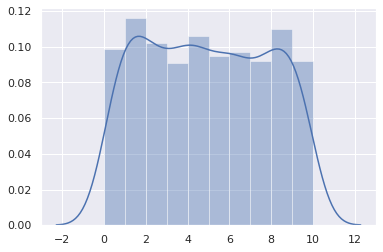

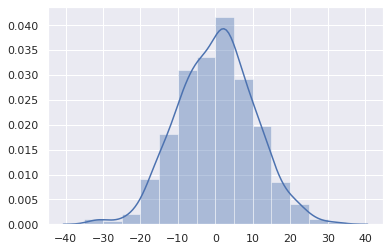

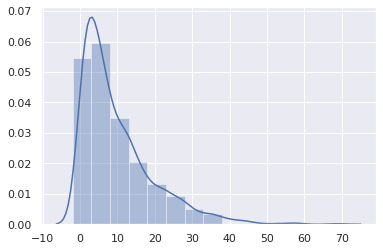

In [123]:
# continuous distributions (uniform, normal)
    # rvs -- generate numbers from distribution
    # cdf -- cumulative distribution function (probability that an observation falls below specified value)
    # ppf -- percent point function (value that corresponds to a provided percentile)

# uniform distribution
    # inside range -- every value equally likely, outside range -- never
size = 1000
loc = 0 # start
scale = 10 # end
x = 9.5 # value
q = .95 # 95 percentile

arr_u = st.uniform.rvs(
    size=size, # generate 1000 numbers
    loc=loc, # distribution start
    scale=scale # distribution end
)
cdf_u = st.uniform.cdf(
    x=x, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)
ppf_u = st.uniform.ppf(
    q=q, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)

# normal distribution (gaussian) (bell-curve)
    # mean -- 0, std -- 1, 
    # 68% within 1 std, 95% within 2 std, 99.7 within 3 std
arr_n = st.norm.rvs(
    size=size, # generate 1000 numbers
    loc=loc, # distribution center
    scale=scale # distribution ends
)
cdf_n = st.norm.cdf(
    x=x, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)
ppf_n = st.norm.ppf(
    q=q, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)

# exponential distribution
arr_e = st.expon.rvs(
    loc=loc,
    scale=scale,
    size=size   
)
cdf_e = st.expon.cdf(
    x=x, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)
ppf_e = st.expon.ppf(
    q=q, # specified value (cdf returns probability that an observation falls below THIS value)
    loc=loc, # start
    scale=scale # end
)


# stats
print(
    'UNIFORM',
    f"uniform mean: {np.round( arr_u.mean(), 3)}", 
    f"uniform std: {np.round( arr_u.std(), 3)}",
    f"uniform cdf (value={x}) : {np.round( cdf_u, 3)}",
    f"uniform ppf (percentile={q}): {np.round( ppf_u, 3)}",
    'NORM',
    f"norm mean: {np.round( arr_n.mean(), 3)}", 
    f"norm std: {np.round( arr_n.std(), 3)}",
    f"norm cdf (value={x}) : {np.round( cdf_n, 3)}",
    f"norm ppf (percentile={q}): {np.round( ppf_n, 3)}",
    'EXPON',
    f"expon mean: {np.round( arr_e.mean(), 3)}", 
    f"expon std: {np.round( arr_e.std(), 3)}",
    f"expon cdf (value={x}) : {np.round( cdf_e, 3)}",
    f"expon ppf (percentile={q}): {np.round( ppf_e, 3)}",
    sep='\n'
)
# distplots
sns.distplot(arr_u, bins=np.arange(-2,13))
plt.show()
sns.distplot(arr_n, bins=np.arange(-40,41,5))
plt.show()
sns.distplot(arr_e, bins=np.arange(-2,41,5))
plt.show()

# plt.subplots_adjust(hspace = 4, wspace=.6)
# plt.subplot(131)
# sns.distplot(arr_u)
# plt.subplot(132)
# sns.distplot(arr_n)
# plt.subplot(133)
# sns.distplot(arr_b)

# fig, axes = plt.subplots(ncols=3)
# plt.subplots_adjust(hspace = 4, wspace=.6)
# sns.distplot(arr_u, ax=axes[0])
# sns.distplot(arr_n, ax=axes[1])
# sns.distplot(arr_b, ax=axes[2])




BINOM
binom mean: 4.974
binom std: 1.558
binom cdf (value=9) : 0.999
binom pmf (value=2) : 0.044
binom ppf (percentile=0.9): 8.0
NBINOM
binom mean: 9.942
binom std: 4.512
binom cdf (value=9) : 0.5
binom pmf (value=2) : 0.013
binom ppf (percentile=0.9): 18.0
GEOMETRIC
geometric mean: 2.036
geometric std: 1.385
geometric cdf (value=9) : 0.998
geometric pmf (value=2) : 0.25
geometric ppf (percentile=0.9): 4.0
POISSON
poisson mean: 1.035
poisson std: 1.012
poisson cdf (value=9) : 1.0
poisson pmf (value=2) : 0.184
poisson ppf (percentile=0.9): 2.0


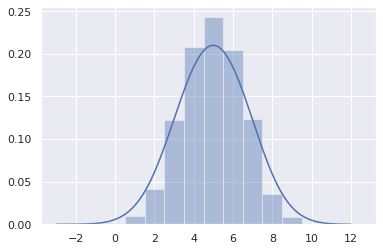

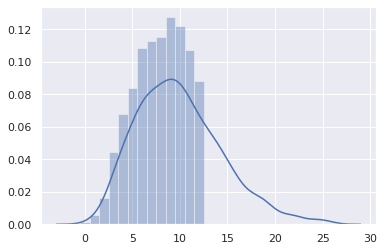

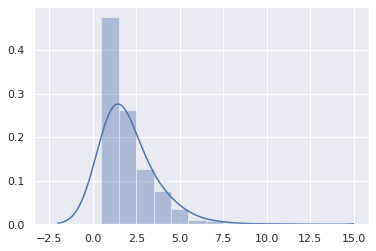

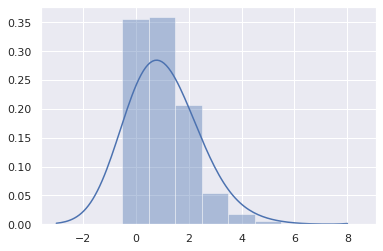

In [201]:
# discrete distributions (binomial, exponential, geometric)
    # rvs -- generate numbers from distribution
    # cdf -- cumulative distribution function (probability that an observation falls below specified value)
    # pmf -- probability mass function (probability that discrete random variable equals specified value)
    # ppf -- percent point function (value that corresponds to a provided percentile)

# binomial distribution
    # discrete probability distribution
n=10
p=.5
size=1000
k_cdf=9.5
k_pmf=2
q=.95

arr_b = st.binom.rvs(
    n=n, # runthroughs per trial
    p=p, # success probability
    size=size, # number of trials
)
cdf_b = st.binom.cdf(
    k=k_cdf,
    n=n, # number of trials
    p=p # probability of success
)
pmf_b = st.binom.pmf(
    k=k_pmf,
    n=n, # number of trials
    p=p # probability of success
)
ppf_b = st.binom.ppf(
    q=q, # specified value (cdf returns probability that an observation falls below THIS value)
    n=n, # number of trials
    p=p # probability of success
)

# negative binomial distribution
    # discrete probability distribution
n=10
p=.5
size=1000
k_cdf=9.5
k_pmf=2
q=.95

arr_nb = st.nbinom.rvs(
    n=n, # number of successes (end condition)
    p=p, # success probability
    size=size, # number of trials
)
arr_nb_count = pd.Series(arr_nb).value_counts()
cdf_nb = st.nbinom.cdf(
    k=k_cdf,
    n=n, # number of successes (end condition)
    p=p # probability of success
)
pmf_nb = st.nbinom.pmf(
    k=k_pmf,
    n=n, # number of successes (end condition)
    p=p # probability of success
)
ppf_nb = st.nbinom.ppf(
    q=q, # specified value (cdf returns probability that an observation falls below THIS value)
    n=n, # number of successes (end condition)
    p=p # probability of success
)

# geometric distributions

size = 1000
p = .5
k_cdf = 9
k_pmf = 2
q = .9

arr_g = st.geom.rvs(
    size=size, #generate values
    p=p # probability
)
arr_g_count = pd.Series(arr_g).value_counts() # counts for each unique value
cdf_g = st.geom.cdf(
    k=k_cdf,
    p=p,
)
pmf_g = st.geom.pmf(
    k=k_pmf,
    p=p
)
ppf_g = st.geom.ppf(
    q=q,
    p=p
)

# poisson
mu = 1 # average time
loc = 0
size = 1000 # generate data
k_cdf = 9
k_pmf = 2
q = .9

arr_p = st.poisson.rvs(
    mu=mu,
    loc=loc,
    size=size
)
cdf_p = st.poisson.cdf(
    k=k_cdf,
    mu=mu
)
pmf_p = st.poisson.pmf(
    k=k_pmf,
    mu=mu
)
ppf_p = st.poisson.ppf(
    q=q,
    mu=mu,
    loc=loc
)


# stats
print(
    'BINOM',
    f"binom mean: {np.round( arr_b.mean(), 3)}", 
    f"binom std: {np.round( arr_b.std(), 3)}",
    f"binom cdf (value={k_cdf}) : {np.round( cdf_b, 3)}",
    f"binom pmf (value={k_pmf}) : {np.round( pmf_b, 3)}",
    f"binom ppf (percentile={q}): {np.round( ppf_b, 3)}",
    'NBINOM',
    f"binom mean: {np.round( arr_nb.mean(), 3)}", 
    f"binom std: {np.round( arr_nb.std(), 3)}",
    f"binom cdf (value={k_cdf}) : {np.round( cdf_nb, 3)}",
    f"binom pmf (value={k_pmf}) : {np.round( pmf_nb, 3)}",
    f"binom ppf (percentile={q}): {np.round( ppf_nb, 3)}",
    'GEOMETRIC',
    f"geometric mean: {np.round( arr_g.mean(), 3)}", 
    f"geometric std: {np.round( arr_g.std(), 3)}",
    f"geometric cdf (value={k_cdf}) : {np.round( cdf_g, 3)}",
    f"geometric pmf (value={k_pmf}) : {np.round( pmf_g, 3)}",
    f"geometric ppf (percentile={q}): {np.round( ppf_g, 3)}",
    'POISSON',
    f"poisson mean: {np.round( arr_p.mean(), 3)}", 
    f"poisson std: {np.round( arr_p.std(), 3)}",
    f"poisson cdf (value={k_cdf}) : {np.round( cdf_p, 3)}",
    f"poisson pmf (value={k_pmf}) : {np.round( pmf_p, 3)}",
    f"poisson ppf (percentile={q}): {np.round( ppf_p, 3)}",
    sep='\n'
)
# visualize
sns.distplot(arr_b, bins=np.arange(-2.5,13.5,1), kde_kws={'bw': 1})
plt.show()
sns.distplot(arr_nb, bins=np.arange(-2.5,13.5,1), kde_kws={'bw': 1})
plt.show()
sns.distplot(arr_g, bins=np.arange(-2.5,13.5,1), kde_kws={'bw': 1})
plt.show()
sns.distplot(arr_p, bins=np.arange(-2.5,9.5,1), kde_kws={'bw': 1})
plt.show()

mean: 9.91
median: 10.0
mode: 10
std: 2.04
var: 4.164
skew: 0.008
kurtosis: 0.183
SEM: 0.204


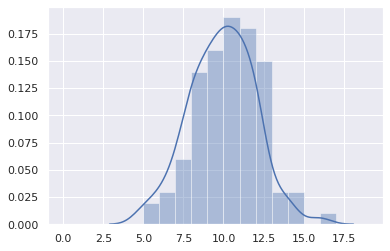

In [179]:
# basic metrics (coin toss) (mean, median, mode, std< var, skew, kurt, sem)

# standard error of the mean (SEM)
    # range (mean +- sem) around mean that future replicate experiments will most likely fall within
    # sem = std / sqrt(observations)
    
# without scipy

# def coin_toss_experiment(simulations, tosses):       
#     arr_coin = []
#     for simulation in np.arange(simulations):
#         result = np.random.randint(0,2,tosses).sum()
#         arr_coin.append(result) # head_count = np.append(arr=head_count, values=[result])
#     return pd.Series(arr_coin)

#  arr_coin = coin_toss_experiment(simulations=100, tosses=20)

# with scipy
arr_coin = st.binom.rvs(
    n=20, # trials
    size=100, # simulations
    p=.5 # probability of success (heads)
)
arr_coin = pd.Series(arr_coin)

# stats
print(
    f"mean: {arr_coin.mean()}", # average value
    f"median: {np.median(arr_coin)}", # middle value
    f"mode: {st.mode(arr_coin).mode[0]}", # scipy.stats.mode # returns mode, count (as ndarray)
    f"std: {np.round(arr_coin.std(), 3)}", # sqrt( sum(x_i - x_mean) ** 2 ) / (observations - 1)
    f"var: {np.round(arr_coin.var(), 3)}", # sum(x_i - x_mean) ** 2 / (observations - 1)
    f"skew: {np.round(arr_coin.skew(), 3)}",
    f"kurtosis: {np.round(arr_coin.kurt(), 3)}",
    f"SEM: {np.round(st.sem(arr_coin), 3)}",
    sep='\n'
)

# visualize
sns.distplot(arr_coin, bins=np.arange(0,20,1)) # histogram and kernel-density-plot (kde)


mean: 0.4
var: 0.24
skew: 0.408
kurt: -1.833


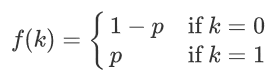

In [171]:
# bernoulli 

# bernoulli.stats
n = 100
p = .4 # skewed coin
mean, var, skew, kurt = st.bernoulli.stats(p, moments='mvsk') # mean, variance, skew, kurtosis
print(
    f"mean: {mean}",
    f"var: {var}",
    f"skew: {np.round(skew, 3)}",
    f"kurt: {np.round(kurt, 3)}",
    sep='\n'
)

# probability mass function (bernoulli)
show_image(fn='pmf-bernoulli.png')

In [154]:
# multivariate basic metrics

# data
df = pd.read_csv(fn)
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
srs_sl = df['sepal_length']
srs_sw = df['sepal_width']

# covariance -- strength of correlation between two or more sets of random variates
    # calculate
        # sum( (x_i - x_mean) * (y_i - y_mean) ) / (observations - 1)
    # interpret
        # positive covariance -- they tend to increase/decrease together
        # negative covariance -- they tend to increase/decrease inversely
    # weakness
        # not normalized
        # can't be used to compare variances over data sets with different scales
    # alternative
        # correlation provides better understanding of relationship between to variables
        # correlation is "normalized variance"
    
# correlation -- extent to which two or more variables fluctuate together
    # positive correlation indicates the extent to which the variables inc/dec in parallel.
    # correlation -- sum( (x_i - x_mean) * (y_i - y_mean) ) / ( (observations - 1) * (std_x * std_y) )
    # correlation coefficient -- covariance / (std_x * std_y)
    
# stats
print(
    f"mean (sepal length): {srs_sl.mean()}", # average value
    f"median (sepal length): {np.median(srs_sl)}", # middle value
    f"mode (sepal length): {st.mode(srs_sl)}", # scipy.stats.mode # most occuring value
    f"std (sepal length): {srs_sl.std()}", # sqrt( sum(x_i - x_mean) ** 2 ) / (observations - 1)
    f"var (sepal length): {srs_sl.var()}", # sum(x_i - x_mean) ** 2 / (observations - 1)
    sep='\n'
)
print(
    "cov (np):",
    np.cov(df.T),
    "corr (np):",
    np.corrcoef(df.T),
    "cov (pd):",
    df.cov(),
    "corr (pd):",
    df.corr(),
    "pearson correlation coefficient:"
    
    sep='\n'
)


# visualize
# sns.distplot(srs_sl) # histogram and kernel-density-plot (kde)
# sns.pairplot(df)

mean (sepal length): 5.843333333333334
median (sepal length): 5.8
mode (sepal length): ModeResult(mode=array([5.]), count=array([10]))
std (sepal length): 0.828066127977863
var (sepal length): 0.6856935123042507
cov (np):
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
corr (np):
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
cov (pd):
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.039268      1.273682     0.516904
sepal_width      -0.039268     0.188004     -0.321713    -0.117981
petal_length      1.273682    -0.321713      3.113179     1.296387
petal_width       0.516904    -0.117981      1.296387     0.582414
corr (pd):
 

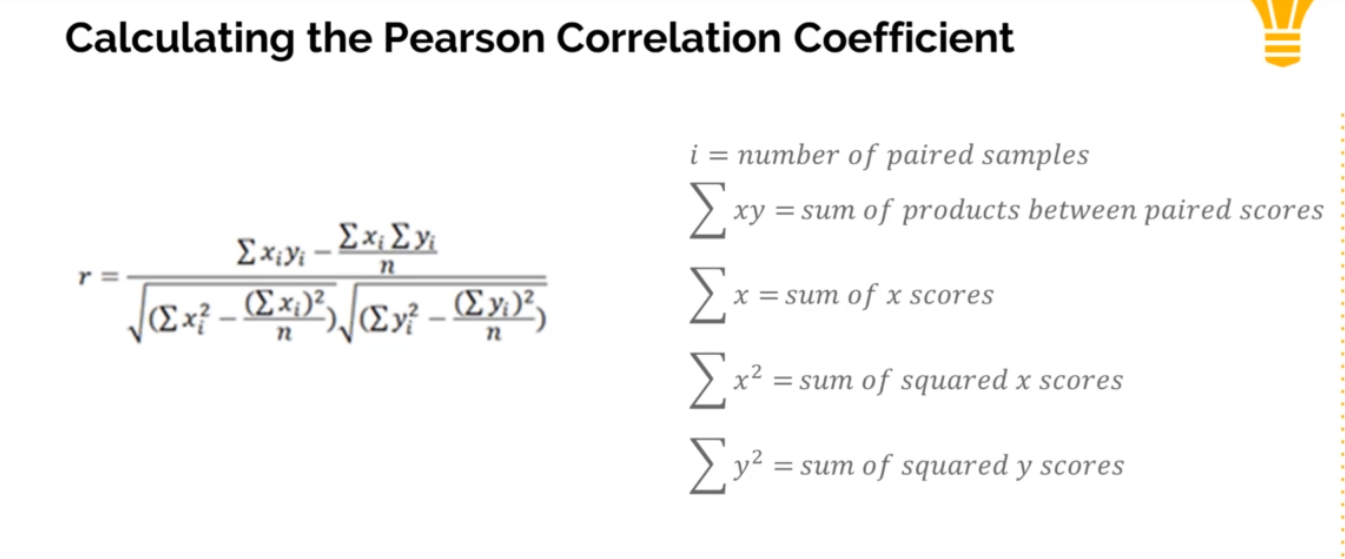

In [13]:
# pearson correlation coefficient

show_image(fn='pearson-correlation-coefficient.png')

In [12]:
# pearson correlation coefficient
    # interpret (p-value)
        # positive -- positive correlation
        # 0 -- no correlation
        # negative -- negative correlation

# data
df = pd.read_csv(fn)
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
srs_sl = df['sepal_length']
srs_sw = df['sepal_width']
srs_pl = df['petal_length']
srs_pw = df['petal_width']

    

print(
    "PEARSON CORRELATION COEFFICIENTS",
    "sl,sw",
    st.pearsonr(srs_sl, srs_sw),
    "sl,pl",
    st.pearsonr(srs_sl, srs_pl),
    "sl,pw",
    st.pearsonr(srs_sl, srs_pw),
    "sw,pl",
    st.pearsonr(srs_sw, srs_pl),
    "sw,pw",
    st.pearsonr(srs_sw, srs_pw),
    "pl,pw",
    st.pearsonr(srs_pl, srs_pw),
    sep='\n'
)


# visualize
# sns.distplot(srs_sl) # histogram and kernel-density-plot (kde)
# sns.pairplot(df)

PEARSON CORRELATION COEFFICIENTS
sl,sw
(-0.10936924995064938, 0.1827652152713699)
sl,pl
(0.8717541573048713, 1.0384540627941062e-47)
sl,pw
(0.8179536333691635, 2.3148491512728037e-37)
sw,pl
(-0.4205160964011546, 8.429366392950215e-08)
sw,pw
(-0.35654408961380585, 7.523890956067442e-06)
pl,pw
(0.9627570970509661, 5.776660988496418e-86)


In [12]:
# hypothesis testing
    # null hypothesis -- no statistically significant difference exists in a set of observations
    # interpret
        # p > alpha (.05) -- null hypothesis supported (may not have statistically significant difference)
        # p < alpha (.05) -- null hypothesis rejected (may have statistically significant difference)
    # many tests compare means -- are the sample means equal or significantly different?
    
# post about hypothesis testing
    # t-test, z-test, f-test, anova, etc
    # https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740
                
# data
df = pd.read_csv(fn)
# split by species
df_s = df[ df['species'] == 'Iris-setosa']
df_ve = df[ df['species'] == 'Iris-versicolor']
# get sepal length for each species
srs_sl_s = df_s['sepal_length']
srs_sl_ve = df_ve['sepal_length'] 
# mean
mean_s = srs_sl_s.mean()
mean_ve = srs_sl_ve.mean()
effect_size = mean_s - mean_ve

# shapiro-wilk test 
    # returns -- test_statistic, pvalue
    # tests null hypothesis -- the population is normally distributed.
shapiro_wilk_s = st.shapiro(srs_sl_s) # scipy.stats.shapiro()
shapiro_wilk_ve = st.shapiro(srs_sl_ve)

# t_test
    # data
        # for related sample sets, use 'st.ttest_rel'
        # for independent sample sets, use 'st.ttest_ind'
    # parametric
    # tests null hypothesis -- the means of two populations are equal
t_test = st.ttest_ind(srs_sl_s, srs_sl_ve, equal_var=True) # scipy.stats.ttest_ind()

# f_test
    # tests null hypothesis (that the variances of two populations are equal)
f_test = st.f_oneway(srs_sl_s, srs_sl_ve)

# z-test (two sample)
    # UNCLEAR ABOUT value PARAMETER
        # I omitted 'value' (default: 0)
        # test statistic = mean1 - mean2 - value
    # tests null hypothesis -- no difference between means of two populations
z_test_value, z_test_p_value = smst.weightstats.ztest(srs_sl_s, srs_sl_ve)

# mww (mann-whitney-wilcoxon ranksum test)
    # non-parametric
    # test null hypothesis -- a random value from pop1 has EQUAL chance of being higher/lower than pop2
        # do the two populations have the same distribution?
        # are random values from both populations similar, or is one population often higher/lower
mww_z_stat, mww_p_val = st.ranksums(srs_sl_s, srs_sl_ve)

print(
    'MEAN (AND EFFECT SIZE)',
    f"mean (Iris-setosa): {mean_s}",
    f"mean (Iris-versicolor): {mean_ve}",
    f"effect size: {np.round(effect_size, 3)}",
    '',
    'TEST FOR NORMAL DISTRIBUTION',
    f"shapiro-wilk (Iris-setosa): {np.round(shapiro_wilk_s[1], 3)}",
    f"shapiro-wilk (Iris-versicolor): {np.round(shapiro_wilk_ve[1], 3)}",
    '',
    'TEST FOR SIMILARITY (NO STATISTICALLY SIGNIFICANT DIFFERENCE)',
    f"t_test: {t_test.pvalue:.2e}",
    f"f_test: {f_test.pvalue:.2e}",
    f"z_test: {z_test_p_value:.2e}",
    f"mww test: {mww_p_val:.2e}",
    sep='\n'    
)

MEAN (AND EFFECT SIZE)
mean (Iris-setosa): 5.006
mean (Iris-versicolor): 5.936
effect size: -0.93

TEST FOR NORMAL DISTRIBUTION
shapiro-wilk (Iris-setosa): 0.46
shapiro-wilk (Iris-versicolor): 0.465

TEST FOR SIMILARITY (NO STATISTICALLY SIGNIFICANT DIFFERENCE)
t_test: 8.99e-18
f_test: 8.99e-18
z_test: 6.91e-26
mww test: 8.94e-14


In [32]:
# one-way analysis of variance (ANOVA)
    # returns -- statistic (computed f-value), pvalue (associated p-value from F-distribution)
    # tests null hypothesis -- that multiple populations have the same mean/variance
    # when only using two populations/means -- f_test is equivalent to t_test 

# data
df = pd.read_csv(fn)
# split by species
df_s = df[ df['species'] == 'Iris-setosa']
df_ve = df[ df['species'] == 'Iris-versicolor']
df_vi = df[ df['species'] == 'Iris-virginica']
# get sepal length for each species
srs_sl_s = df_s['sepal_length']
srs_sl_ve = df_ve['sepal_length'] 
srs_sl_vi = df_vi['sepal_length']
# anova
anova_f_val, anova_p_val = st.f_oneway(srs_sl_s, srs_sl_ve, srs_sl_vi)
print(
    f"anova: {anova_p_val}"
)

anova: 1.6696691907693826e-31


In [163]:
# binom test

# coin toss (scipy)
    # bernoulli -- a bernoulli discrete random variable
    # rvs -- simulations (generate random variates)
    # binom -- binomial discrete random variable

# simulations (skewed coin)
size = 10000
p_skewed = .4
results_s = st.bernoulli.rvs(
    size=size, 
    p=p_skewed
)
# interpret results
heads = sum(results_s)
tails = size - heads
mu_s = results_s.mean()
std_s = results_s.std()
var_s = results_s.var()
print(
    'SKEWED COIN RESULTS',
    f'heads_s: {heads}', 
    f'tails_s: {tails}',
    'SKEWED COIN STATS',
    f'mu_s: {mu_s}',
    f'std_s: {np.round(std_s, 3)}',
    f'var_s: {np.round(var_s, 3)}',
    sep='\n'
)

# fair coin
size = 10000
p_fair = .5
results_f = st.bernoulli.rvs(
    size=size,
    p=p_fair) 
mu_f = results_f.mean()
std_f = results_f.std()
var_f = results_f.var()
print(
    'FAIR COIN STATS',
    f'mu_f: {mu_f}',
    f'std_f: {np.round(std_f, 3)}',
    f'var_f: {np.round(var_f, 3)}',
    sep='\n'
)

# binomial test
    # args:  outcome, total trials, predicted p-value
    # test null hypothesis -- probablity of success in bernoulli experiment is 'p'
binom_test_results = st.binom_test(heads, size, p_fair) # outcome, number of trials, p value
print(
    'BINOMIAL TEST',
    'if p-value < alpha (.05), reject null hypothesis. Coin is skewed.',
    f'test_results: {binom_test_results:.2e}',
    sep='\n'
)

SKEWED COIN RESULTS
heads_s: 4066
tails_s: 5934
SKEWED COIN STATS
mu_s: 0.4066
std_s: 0.491
var_s: 0.241
FAIR COIN STATS
mu_f: 0.5054
std_f: 0.5
var_f: 0.25
BINOMIAL TEST
if p-value < alpha (.05), reject null hypothesis. Coin is skewed.
test_results: 3.11e-78


In [287]:
# resampling

# data
df = pd.read_csv(fn)
df_vi = df[ df['species'] == 'Iris-virginica']
# srs
srs = df_s['sepal_length']
# resampled series
srs_resample = resample(srs, n_samples=1000)
# stats (original / resampled)
print(
    f"mean (original): {np.round(srs.mean(), 3)}",
    f"mean (resampled): {np.round(srs_resample.mean(), 3)}",
    f"std (original): {np.round(srs.std(), 3)}",
    f"std (resampled): {np.round(srs_resample.std(), 3)}",
    f"var (original): {np.round(srs.var(), 3)}",
    f"var (resampled): {np.round(srs_resample.var(), 3)}",
    sep='\n'
)

mean (original): 5.006
mean (resampled): 5.002
std (original): 0.352
std (resampled): 0.346
var (original): 0.124
var (resampled): 0.12


In [ ]:
# bootstrapping 
    # take sample of population
    # calculate statistic
    # repeat
    # take average of calculated statistics
    
# bootstrap (95% confidence intervals)


In [299]:
# confidence intervals (with bootstrap)

# data
df = pd.read_csv(fn)
df_vi = df[ df['species'] == 'Iris-virginica']
# srs
srs = df_s['sepal_length']
srs = resample(srs, n_samples=1000)
# confidence interval
confidence = .95
n = len(srs) # observations

# method 1
    # https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
single_draw = st.norm.interval(confidence, loc=srs.mean(), scale=srs.std())
print(single_draw)
mean_of_n_draws = st.norm.interval(confidence, loc=srs.mean(), scale=st.sem(srs))
print(mean_of_n_draws)

# method 2
    # https://kite.com/python/examples/702/scipy-compute-a-confidence-interval-from-a-dataset
h = st.sem(srs) * st.t.ppf((1 + confidence) / 2, n - 1)
print ( ((m - h), (m + h)) )


(4.321233782023214, 5.671566217976785)
(4.975049369519916, 5.017750630480083)
(4.9846234707663575, 5.027376529233643)


In [11]:
# outliers
    # quartiles -- 25% (lower), 50% (middle), 75% (upper)
    # IQR (interquartile range) -- difference between lower/upper quartiles
    # a value is an outlier if it exceeds 1.5 IQRs past the upper or lower quartile

# data
df = pd.read_csv(fn)
srs_sl = df['sepal_length']
arr_sl = srs_sl.to_numpy()

# mean -- average
mean = np.mean(arr_sl)
# standard deviation -- devaition from the whole -- sqrt(sum((x_i - x_mean) ^ 2) / (observations - 1))
    # `n-1` is used, because std is often underestimated when sampling (besssel's correction)
    # if calculating std for entire population, use `n`
std = np.std(arr_sl)
# z_score -- standard score -- how many standard deviations away from the mean
    # allows us to compare things that are NOT in the same scale, as long as they have normal distribution.
z_scores = np.abs((arr_sl - mean) / std)
z_scores = st.zscore(arr_sl)
# how many standard deviations are we allowing
threshold = 2
good = z_scores < threshold
passing = arr_sl[good]
failing = arr_sl[~(good)] # np.logical_not()
print(
    f"mean: {round(mean, 2)}",
    f"std: {round(std, 2)}",
    f"threshold: {threshold} standard deviations",
    f"passing: {len(passing)}",
    f"failing: {len(failing)}",
    sep='\n'
)

mean: 5.84
std: 0.83
threshold: 2 standard deviations
passing: 144
failing: 6


In [158]:
# outliers (multidimensional)

# data
df = pd.read_csv(fn)
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# mean
mean = np.mean(df, axis=0)
# covariance
cov = np.cov(df.T)
# multivariate normal
    # pdf -- probability density function -- density of a continuous random variable. 
        # relative likelihood that the value of the random variable would equal a sample
srs_mn = st.multivariate_normal(mean, cov).pdf(df) 
threshold = .01
good = srs_mn > threshold
passing = df[good]
failing = df[~good]

print(
    f"mean: ",
    f"{round(mean, 2)}",
    f"cov: ",
    f"{np.round(cov, 2)}",
    f"threshold: {threshold}",
    f"passing: {len(passing)}",
    f"failing: {len(failing)}",
    sep='\n'
)

mean: 
sepal_length    5.84
sepal_width     3.05
petal_length    3.76
petal_width     1.20
dtype: float64
cov: 
[[ 0.69 -0.04  1.27  0.52]
 [-0.04  0.19 -0.32 -0.12]
 [ 1.27 -0.32  3.11  1.3 ]
 [ 0.52 -0.12  1.3   0.58]]
threshold: 0.01
passing: 135
failing: 15


In [159]:
# outliers (sklearn)

# data
df = pd.read_csv(fn)
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
good = lof.fit_predict(df) == 1 # 1 -- good data, -1 -- outlier
passing = df[good]
failing = df[~good]

print(
    f"passing: {len(passing)}",
    f"failing: {len(failing)}",
    sep='\n'
)

passing: 142
failing: 8


(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

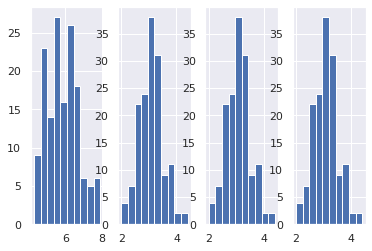

In [160]:
# histogram
df = pd.read_csv(fn)
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

srs_sl = df['sepal_length']
srs_sw = df['sepal_width']
srs_pl = df['petal_length']
srs_pw = df['petal_width']

plt.subplot(141)
plt.hist(srs_sl, label='sepal_length')
plt.subplot(142)
plt.hist(srs_sw, label='sepal_width')
plt.subplot(143)
plt.hist(srs_sw, label='petal_length')
plt.subplot(144)
plt.hist(srs_sw, label='petal_width')